In [6]:
from sklearn import tree
import pandas as pd
import pydotplus
from IPython.display import Image

In [7]:
datasea = pd.read_csv('data_sea.csv')

In [8]:
datasea

Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
0    1880-03-15                  0.000000          -0.952756   
1    1881-03-15                  0.220472          -0.732283   
2    1882-03-15                 -0.440945          -1.346457   
3    1883-03-15                 -0.232283          -1.129921   
4    1884-03-15                  0.590551          -0.283465   
..          ...                       ...                ...   
269         NaN                       NaN                NaN   
270         NaN                       NaN                NaN   
271         NaN                       NaN                NaN   
272         NaN                       NaN                NaN   
273         NaN                       NaN                NaN   

     Upper Error Bound  NOAA Adjusted Sea Level  Temperature Weather  
0             0.952756                      0.0  Overheating     Hot  
1             1.173228                      NaN  Overheating     Hot  
2             0.464567                      NaN  Overheating     Hot  
3             0.665354                      NaN  Overheating     Hot  
4             1.464567                      NaN  Overheating     Hot  
..                 ...                      ...          ...     ...  
269                NaN                      NaN  Normal cold    Cold  
270                NaN                      NaN  Normal cold    Cold  
271                NaN                      NaN  Normal cold    Cold  
272                NaN                      NaN  Normal cold    Cold  
273                NaN                      NaN  Normal cold    Cold  

[274 rows x 7 columns]

In [9]:
dummies_data = datasea.iloc[:, 5:6].values
dummies_data

array([['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Normal heat'],
       ['Normal heat'],
       ['Normal heat'],
       ['Normal heat'],
       ['Overheating'],
       ['Overheating'],
       ['Overheating'],
       ['Normal heat'],
       ['Normal heat'],
       ['Normal 

In [11]:
ground_data = datasea[['Year','Temperature','Weather']]
ground_data

Year  Temperature Weather
0    1880-03-15  Overheating     Hot
1    1881-03-15  Overheating     Hot
2    1882-03-15  Overheating     Hot
3    1883-03-15  Overheating     Hot
4    1884-03-15  Overheating     Hot
..          ...          ...     ...
269         NaN  Normal cold    Cold
270         NaN  Normal cold    Cold
271         NaN  Normal cold    Cold
272         NaN  Normal cold    Cold
273         NaN  Normal cold    Cold

[274 rows x 3 columns]

In [12]:
one_hot_data = pd.get_dummies(ground_data)



one_hot_data = pd.get_dummies(ground_data)
one_hot_data

Year_1880-03-15  Year_1881-03-15  Year_1882-03-15  Year_1883-03-15  \
0                  1                0                0                0   
1                  0                1                0                0   
2                  0                0                1                0   
3                  0                0                0                1   
4                  0                0                0                0   
..               ...              ...              ...              ...   
269                0                0                0                0   
270                0                0                0                0   
271                0                0                0                0   
272                0                0                0                0   
273                0                0                0                0   

     Year_1884-03-15  Year_1885-03-15  Year_1886-03-15  Year_1887-03-15  \
0                  0                0                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                0                0   
4                  1                0                0                0   
..               ...              ...              ...              ...   
269                0                0                0                0   
270                0                0                0                0   
271                0                0                0                0   
272                0                0                0                0   
273                0                0                0                0   

     Year_1888-03-15  Year_1889-03-15  ...  Year_3/15/2011  Year_3/15/2012  \
0                  0                0  ...               0               0   
1                  0                0  ...               0               0   
2                  0                0  ...               0               0   
3                  0                0  ...               0               0   
4                  0                0  ...               0               0   
..               ...              ...  ...             ...             ...   
269                0                0  ...               0               0   
270                0                0  ...               0               0   
271                0                0  ...               0               0   
272                0                0  ...               0               0   
273                0                0  ...               0               0   

     Year_3/15/2013  Year_3/15/2014  Temperature_Excessive cold  \
0                 0               0                           0   
1                 0               0                           0   
2                 0               0                           0   
3                 0               0                           0   
4                 0               0                           0   
..              ...             ...                         ...   
269               0               0                           0   
270               0               0                           0   
271               0               0                           0   
272               0               0                           0   
273               0               0                           0   

     Temperature_Normal cold  Temperature_Normal heat  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   
..                       ...                      ...   
269                        1                        0   
270  

In [13]:
 
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(one_hot_data, ground_data['Temperature'])
clf_train = clf.fit(one_hot_data, ground_data['Weather'])

In [14]:
!pip install graphviz

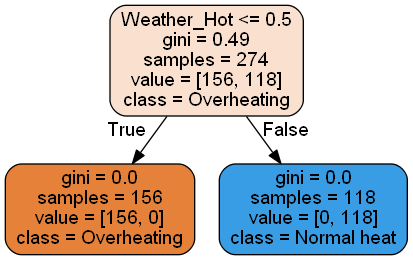

In [15]:
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values),
class_names=[ 'Overheating','Normal heat','Normal cold', 'Excessive cold','Hot','Cold'],
rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())